# Seoul Bike Data
We have several attributes pertaining to weather used to predict the amount of bikes rented per hour in Seoul. Predicting the amount of bikes needed in a given hour will reduce wait times.

# Importing Data Set and Libraries

In [1]:
import pandas as pd
from sklearn.linear_model import SGDRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://github.com/pedigonatalie/Seoul-Bike-Data/raw/main/SeoulBikeData.csv'
data = pd.read_csv(url, encoding ='latin1')
df = pd.DataFrame(data)
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

# Preprocessing Data

In [2]:
# check for null values
df.isnull().sum()

# check for missing data
df.isna().sum()

# check for inconsistencies (?)

# removing redundant rows
df.drop_duplicates(inplace=True)
df.shape

# convert any categorical attributes to numerical, if needed
# ref: #https://saturncloud.io/blog/how-to-convert-categorical-data-to-numerical-data-with-pandas/#:~:text=Converting%20Categorical%20Data%20to%20Numerical%20Data&text=The%20easiest%20way%20to%20convert,numerical%20representation%20of%20each%20category.
df['Seasons'] = df['Seasons'].astype('category')
df['Seasons'] = df['Seasons'].cat.codes

df['Holiday'] = df['Holiday'].astype('category')
df['Holiday'] = df['Holiday'].cat.codes

df['Functioning Day'] = df['Functioning Day'].astype('category')
df['Functioning Day'] = df['Functioning Day'].cat.codes

df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day of Week'] = df['Date'].dt.weekday
df.drop('Date', axis=1, inplace=True)

df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  Functioning Day  Month  Day  \
0           0.0            0.0        3        1                1     12    1   
1           0.0            0.0        3        1                1     12    1   
2           0.0            0.0        3        1                1     12    1   
3           0.0            0.0        3        1                1     12    1   
4           0.0            0.0        3        1                1     12    1   

   Day of Week  
0            4  
1            4  
2            4  
3            4  
4            4

In [3]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = df['Rented Bike Count']
X = df.drop(['Rented Bike Count'], axis=1)
X_scaled = scaler.fit_transform(X)

In [4]:
# After scaling X, the columns should now have mean of 0 and variance of 1
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.describe()

Hour  Temperature(°C)   Humidity(%)  Wind speed (m/s)  \
count  8.760000e+03     8.760000e+03  8.760000e+03      8.760000e+03   
mean   2.027805e-19     9.733462e-17  1.362685e-16     -4.542282e-17   
std    1.000057e+00     1.000057e+00  1.000057e+00      1.000057e+00   
min   -1.661325e+00    -2.568868e+00 -2.859660e+00     -1.664583e+00   
25%   -8.306624e-01    -7.855668e-01 -7.969184e-01     -7.960588e-01   
50%    0.000000e+00     6.840822e-02 -6.022497e-02     -2.170429e-01   
75%    8.306624e-01     8.051710e-01  7.746943e-01      5.549784e-01   
max    1.661325e+00     2.220090e+00  1.953404e+00      5.476614e+00   

       Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
count      8.760000e+03               8.760000e+03             8.760000e+03   
mean      -5.515629e-17              -5.191180e-17             1.687133e-16   
std        1.000057e+00               1.000057e+00             1.000057e+00   
min       -2.317786e+00              -2.655039e+00            -6.551317e-01   
25%       -8.167930e-01              -6.718274e-01            -6.551317e-01   
50%        4.293764e-01               7.857709e-02            -6.436202e-01   
75%        9.258713e-01               8.213244e-01             4.154376e-01   
max        9.258713e-01               1.770816e+00             3.396916e+00   

       Rainfall(mm)  Snowfall (cm)       Seasons       Holiday  \
count  8.760000e+03   8.760000e+03  8.760000e+03  8.760000e+03   
mean  -1.216683e-18   1.297795e-17  7.786770e-17  6.164526e-17   
std    1.000057e+00   1.000057e+00  1.000057e+00  1.000057e+00   
min   -1.317999e-01  -1.718911e-01 -1.342395e+00 -4.390647e+00   
25%   -1.317999e-01  -1.718911e-01 -4.450063e-01  2.277569e-01   
50%   -1.317999e-01  -1.718911e-01 -4.450063e-01  2.277569e-01   
75%   -1.317999e-01  -1.718911e-01  4.523821e-01  2.277569e-01   
max    3.089303e+01   1.997826e+01  1.349771e+00  2.277569e-01   

       Functioning Day         Month           Day   Day of Week  
count     8.760000e+03  8.760000e+03  8.760000e+03  8.760000e+03  
mean     -4.380058e-17  5.191180e-17 -6.813423e-17 -5.191180e-17  
std       1.000057e+00  1.000057e+00  1.000057e+00  1.000057e+00  
min      -5.356764e+00 -1.602745e+00 -1.673503e+00 -1.502916e+00  
25%       1.866799e-01 -7.326381e-01 -8.777093e-01 -1.002401e+00  
50%       1.866799e-01  1.374690e-01  3.176946e-02 -1.371274e-03  
75%       1.866799e-01  1.007576e+00  8.275634e-01  9.996587e-01  
max       1.866799e-01  1.587648e+00  1.737042e+00  1.500174e+00

<Axes: >

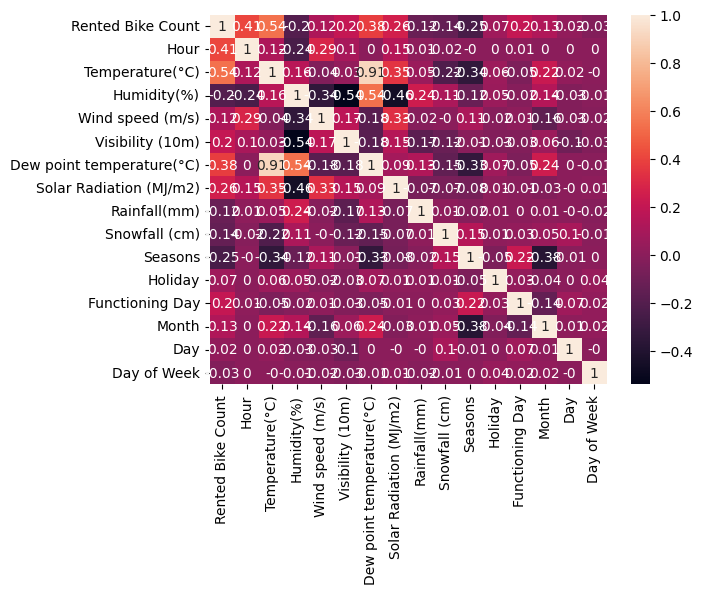

In [5]:
# find attributes most correlated with the outcome
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

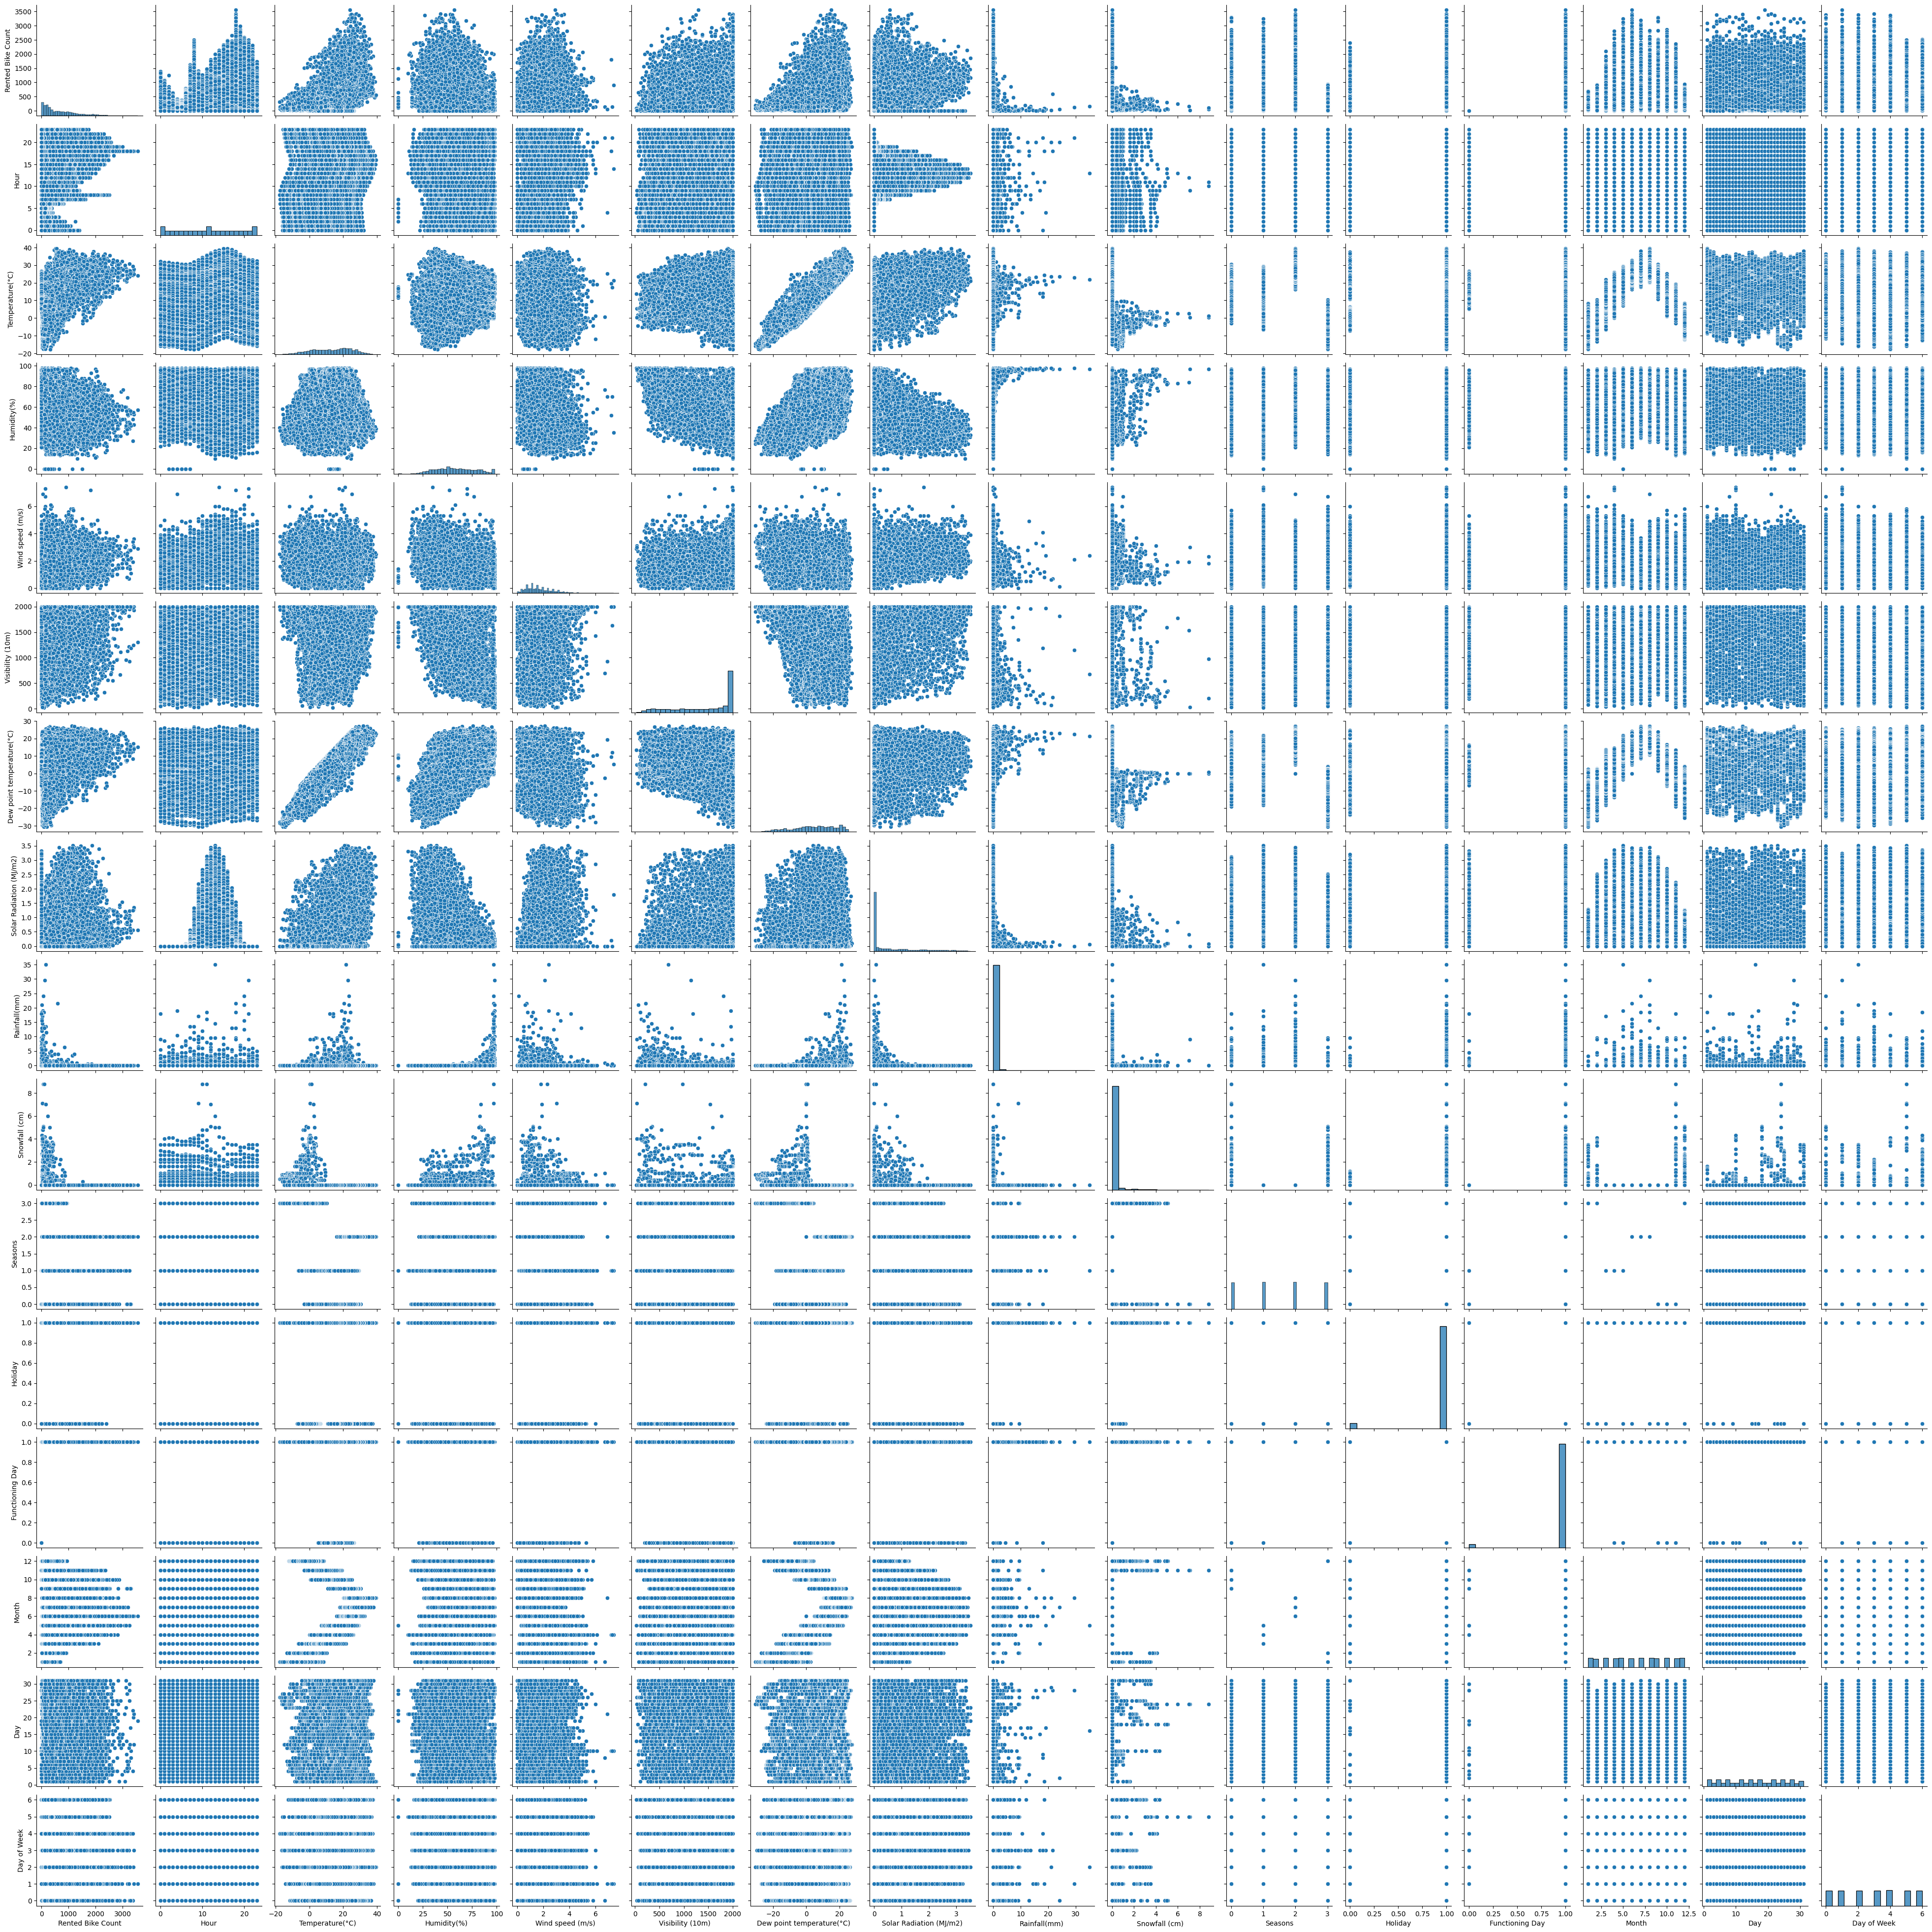

In [79]:
sns.pairplot(df)

In [6]:
# get rid of any attributes not correlated with the outcome
features = ['Temperature(°C)', 'Humidity(%)', 'Hour', 'Dew point temperature(°C)']

<Axes: >

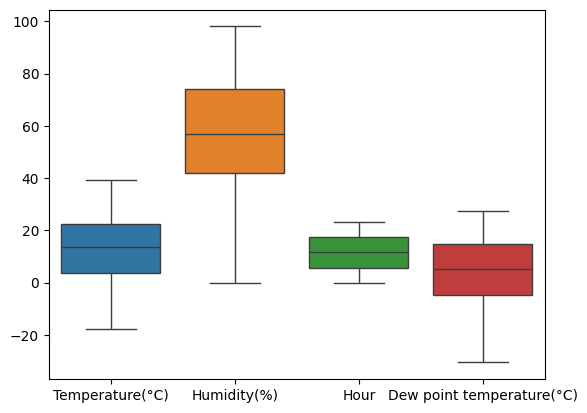

In [78]:
sns.boxplot(data=df[features])

In [7]:
X = X_scaled[features]

In [8]:
# split the data into testing and training parts (ratio is up to us)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [9]:
X_train.shape, X_test.shape

((7008, 4), (1752, 4))

# Model Construction

In [69]:
# use training dataset to construct a linear regression model using gradient descent
# Use GridSearchCV to determine the best parameters
from sklearn.model_selection import GridSearchCV
params = [{'early_stopping' : [True, False],'max_iter' : [1000, 10000, 100000], 'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive'], 'alpha' : [0.001, 0.0001, 0.00001], 'tol' : [0.0001, 0.001, 0.01, 0.1]}]
my_grid = GridSearchCV(estimator = SGDRegressor(), param_grid=params, scoring = 'r2')
my_grid.fit(X_train, y_train)
print(my_grid.best_params_)

{'alpha': 0.0001, 'early_stopping': True, 'learning_rate': 'adaptive', 'max_iter': 10000, 'tol': 0.1}


In [70]:
sgd = SGDRegressor(max_iter=10000, tol=1e-4, early_stopping = True, random_state = 5, alpha = 0.01)
sgd.fit(X_train, y_train)

# tune hyper-parameters and log experiments

SGDRegressor(alpha=0.01, early_stopping=True, max_iter=10000, random_state=5,
             tol=0.0001)

In [71]:
sgd.coef_

array([ 214.7319617 , -204.61904835,  202.55152297,  160.83217773])

In [72]:
sgd.intercept_

array([704.87928957])

In [73]:
y_pred_train = sgd.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
ev_train = explained_variance_score(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print('MSE Train:', mse_train)
print('MAE Train:', mae_train)
print('EV Train:', ev_train)
print('R2 Train:', r2_train)
print('Score Train:', sgd.score(X_train, y_train))
print(sgd.coef_)

MSE Train: 226813.50325400545
MAE Train: 351.4206786135883
EV Train: 0.45477124678870373
R2 Train: 0.45477072582253586
Score Train: 0.45477072582253586
[ 214.7319617  -204.61904835  202.55152297  160.83217773]


In [66]:
# apply our model to the testing portion of the dataset
sgd.score(X_test, y_test)

0.4440227892340881

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [76]:
# Report the test dataset error values for the best set of parameters obtained from previous part
# If you are not satisfied with your answer, you can repeat the training step.

print('MSE Test:', mse)
print('MAE Test:', mae)
print('EV Test:', ev)
print('R2 Test:', r2)
print('Score Test:', sgd.score(X_test, y_test))
print(sgd.coef_)

MSE Test: 231212.22847996265
MAE Test: 358.05682165122766
EV Test: 0.4440481614887323
R2 Test: 0.4440227892340881
Score Test: 0.4440227892340881
[ 214.7319617  -204.61904835  202.55152297  160.83217773]


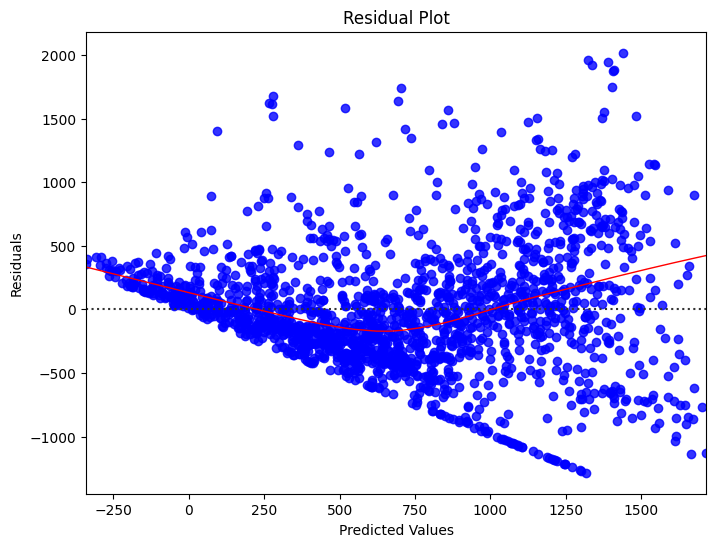

In [81]:
# residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue', line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()